Pronóstico de la popularidad de libros
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/predictive-analytics/blob/master/10-logreg-R-books.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/predictive-analytics/blob/master/10-logreg-R-books.ipynb) para ver la última versión online en `nbviewer`. 

---
[Licencia](https://github.com/jdvelasq/predictive-analytics/blob/master/LICENSE)  
[Readme](https://github.com/jdvelasq/predictive-analytics/blob/master/readme.md)

# Definición del problema real

La editorial O'Really desea construir una herramienta analítica que le permita a un editor estimar la popularidad relativa de un nuevo libro antes de su lanzamiento, con el fin de poder priorizar los títulos a publicar e inclusive rechazar posibles proyectos editoriales. 

# Definición del problema en términos de los datos

Para resolver este problema se tiene una base de datos con los 100 libros más vendidos por O'Really durante el año 2011. La base contiene el título del libro, su descripción y su ranking en pupularidad. Para este caso se hipotetiza que la aparición de ciertas palabras en la descripción del libro permitirá determinar su popularidad.

# Exploración

In [ ]:
## Carga y verificación de los datos
## ranks <- read.csv('data/oreilly.csv', stringsAsFactors = FALSE)
## str(ranks)

## 'data.frame':	100 obs. of  5 variables:
##  $ IP_Family : chr  "9780596000271.IP" "9781565923928.IP" "9780596007126.IP" "9780596009205.IP" ...
##  $ BOOK.title: chr  "Programming Perl, 3E" "Javascript: The Definitive Guide, 3E" "Head First Design Patterns" "Head First Java, 2E" ...
##  $ BOOK.ISBN : num  9.78e+12 9.78e+12 9.78e+12 9.78e+12 9.78e+12 ...
##  $ Rank      : int  1 2 3 4 5 6 7 8 9 10 ...
##  $ Long.Desc.: chr  "Perl is a powerful programming language that  has grown in popularity since it first appeared in 1988. The firs"| __truncated__ "JavaScript is a powerful scripting language that can be embedded directly in HTML. It allows you to create dyna"| __truncated__ "You're not alone.<br />\n<br />\nAt any given moment, somewhere in the world someone struggles with the same so"| __truncated__ "Learning a complex new language is no easy task especially when it s an object-oriented computer programming la"| __truncated__ ...
## 

'data.frame':	100 obs. of  5 variables:
 $ IP_Family : chr  "9780596000271.IP" "9781565923928.IP" "9780596007126.IP" "9780596009205.IP" ...
 $ BOOK.title: chr  "Programming Perl, 3E" "Javascript: The Definitive Guide, 3E" "Head First Design Patterns" "Head First Java, 2E" ...
 $ BOOK.ISBN : num  9.78e+12 9.78e+12 9.78e+12 9.78e+12 9.78e+12 ...
 $ Rank      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Long.Desc.: chr  "Perl is a powerful programming language that  has grown in popularity since it first appeared in 1988. The firs"| __truncated__ "JavaScript is a powerful scripting language that can be embedded directly in HTML. It allows you to create dyna"| __truncated__ "You're not alone.<br />\n<br />\nAt any given moment, somewhere in the world someone struggles with the same so"| __truncated__ "Learning a complex new language is no easy task especially when it s an object-oriented computer programming la"| __truncated__ ...


# Metodología

Un árbol de modelos, es similar al arbol de regresión pero la salida de cada nodo es un modelo de regresión lineal. Haciendo la misma analogía con la figura anterior, la salida del nodo azul será calculada mediante el modelo de regresión:


$$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$


estimado con los patrones de entrenamiento pertenecientes a la región azul.


# Entrenamiento del modelo

In [ ]:
## carga la libreria para text mining
## library(tm)

## La clasificación se basa únicamente en la descripción
## y no se tiene en cuenta el título.
## documents <- data.frame(doc_id = ranks$BOOK.ISBN, text = ranks$Long.Desc.) 
## row.names(documents) <- 1:nrow(documents)

## Crea el corpus y limpia el documento.
## corpus <- Corpus(DataframeSource(documents))
## corpus <- tm_map(corpus, tolower)
## corpus <- tm_map(corpus, stripWhitespace)
## corpus <- tm_map(corpus, removeWords, stopwords('english'))

## Crea la matriz de términos
## dtm <- DocumentTermMatrix(corpus)

## Obtiene los regresores y la variable independiente.
## La matriz de términos del documento se convierte en
## una matriz numérica para poder realizar la regresión.
## x <- as.matrix(dtm) 
## y <- rev(1:100)  # 100, 99, ...

Este problema será resuelto como un problema de clasificación. Para ello, se pronosticará si un libro está en el top 50 o no. Nótese que también se podrían formularse otras agrupaciones como el top 10, top 20, etc.

In [ ]:
## Semilla del generador de aleatorios.
## set.seed(1)      

## Regresión con regularización.
## library(glmnet)

## La variable y indica si el libro pertence (1) o no pertenece (2)
## al top 50 de los libros. A continuación se genera un vector con
## 50 unos y 50 ceros.
## y <- rep(c(1, 0), each = 50)

## Crea un data.frame vacío para almacenar los resultados
## de la regresión para diferentes parámetros.
## performance <- data.frame()

## Itera sobre diferentes valores de lambda.
## for (i in 1:50) 
## {
##     ## Divide aleatoriamente el conjunto de datos
##     ## en una muestra para el entrenamiento y otra
##     ## para prueba
##     indices <- sample(1:100, 80) 
##     training.x <- x[indices, ] 
##     training.y <- y[indices]
##     
##     test.x <- x[-indices, ] 
##     test.y <- y[-indices]
##     
##     ## Realiza la regresión logística para diferentes 
##     ## valores de lambda.   
##     for (lambda in c(0.0001, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.5, 1)) 
##     {
##         ## Realiza la regresión.
##         glm.fit <- glmnet(training.x, training.y, family = 'binomial')
##         
##         ## Pronóstico para la muestra de entrenamiento
##         predicted.y <- predict(glm.fit, test.x, s = lambda) 
##         
##         ## Convierte el valor pronósticado en 0=no pertenece, 1=si pertenece.
##         predicted.y = ifelse(predicted.y > 0, 1, 0)
##         
##         ## Métrica de error
##         error.rate <- mean(predicted.y != test.y)
##         
##         ## Almacena el resultado
##         performance <- rbind(performance, data.frame(Lambda = lambda, Iteration = i, ErrorRate = error.rate))
##     } 
## }

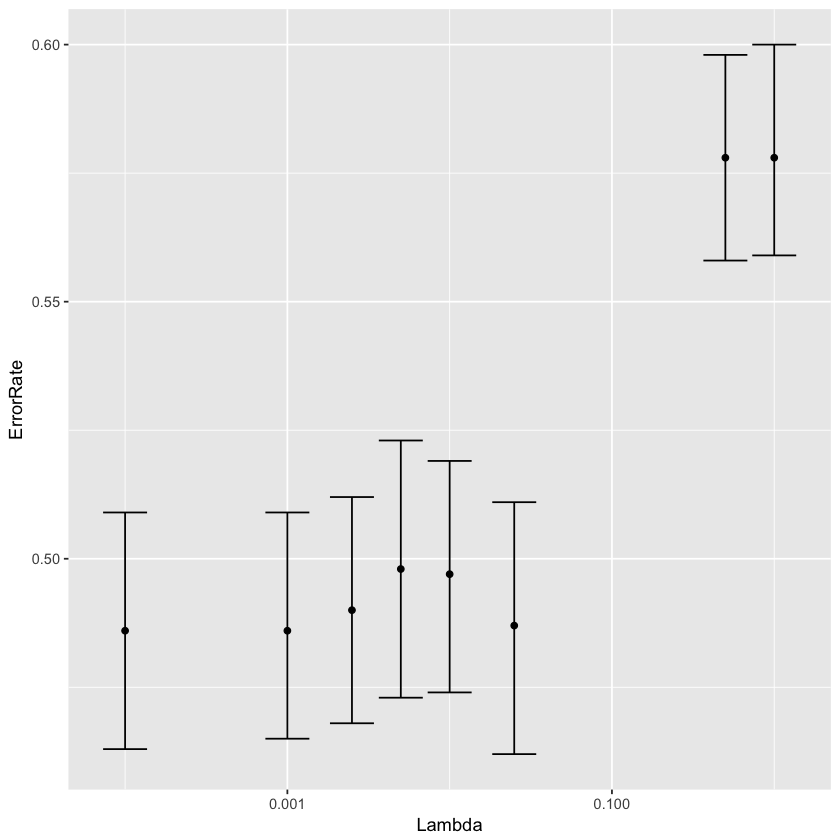

In [ ]:
## El resultado de la siguiente gráfica muestra que se obtendría un
## mejor modelo para valores pequeños de lambda
## ggplot(performance, aes(x = Lambda, y = ErrorRate)) + stat_summary(fun.data = 'mean_cl_boot', geom = 'errorbar') + stat_summary(fun.data = 'mean_cl_boot', geom = 'point') + scale_x_log10()

## plot without title

---

Pronóstico de la popularidad de libros
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/predictive-analytics/blob/master/10-logreg-R-books.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/predictive-analytics/blob/master/10-logreg-R-books.ipynb) para ver la última versión online en `nbviewer`. 

---
[Licencia](https://github.com/jdvelasq/predictive-analytics/blob/master/LICENSE)  
[Readme](https://github.com/jdvelasq/predictive-analytics/blob/master/readme.md)